In [55]:
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [30]:
df= pd.read_csv('heart_cleveland_upload.csv')

In [31]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [32]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0
296,35,1,3,126,282,0,2,156,1,0.0,0,0,2,1


In [33]:
df.info()
print(df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB
(297, 14)


In [34]:
#The df.describe() method provides a quick overview 
#of the distribution and range of values for numerical columns in the DataFrame. 
#It can help in understanding the data, identifying outliers, and gaining insights into the central tendency 
#and dispersion of the data.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [35]:
#checking the count of null values in each column 
df.isnull().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

there are no null values in the dataset 


In [36]:
!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
import pandas_profiling as pp
pp.ProfileReport(df)

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Preparing metadata (setup.py) ... done


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Pandas profiling is an open-source Python library that generates a comprehensive report with descriptive statistics and exploratory analysis of a pandas DataFrame. It provides a quick and convenient way to gain insights into the data, identify patterns, and understand its characteristics.


# Feature selection 

The SelectKBest class is a feature selection technique available in the scikit-learn library in Python. It is used to select the top K features from a dataset based on a scoring function. This class helps to reduce the dimensionality of the dataset by selecting the most informative features. It is instantiated with the chi2 scoring function 

In [37]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
data=df.copy()
#assign features to X
x= data.iloc[:, 0:13] #selects all rows and the columns from index 0 to index 12
#assign target variable to y 
y= data.iloc[:, -1] #selects all rows and the last column of the DataFrame
#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=12)
#calculates the feature scores based on the specified scoring function and determines which features to select
fit = bestfeatures.fit(x,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
#concat two dataframes for better visualization (coloum wise concatenation)
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(12,'Score'))  #print 10 best features- 10 features with the highest scores

       Specs       Score
7    thalach  187.053104
12      thal   87.903888
11        ca   82.730613
9    oldpeak   68.570533
8      exang   35.508090
0        age   22.917697
2         cp   21.352432
4       chol   20.855084
10     slope   20.818579
3   trestbps   16.707463
6    restecg    8.134652
1        sex    7.444195


# Feature Importance

We can gain significance of each features by using model charactersistic property. In tree-based classifiers, such as DecisionTreeClassifier, RandomForestClassifier, and ExtraTreesClassifier, there is an inbuilt class attribute called feature_importances_. This attribute provides a measure of the importance of each feature in the classification process. we will use the RandomForestClassifier to extract the top 10 features for the dataset

[0.08730368 0.02924885 0.13286791 0.07012813 0.08071606 0.0102216
 0.02130964 0.12182411 0.04758068 0.09615616 0.0475146  0.13091403
 0.12421455]


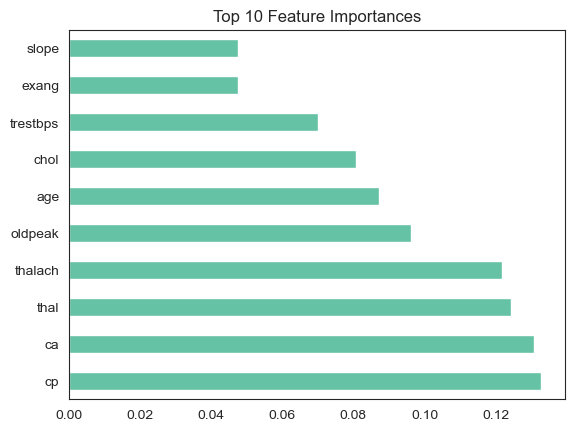

In [38]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()
clf.fit(x,y)
print(clf.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(data= clf.feature_importances_, index=x.columns)
feat_importances.nlargest(10).plot(kind='barh', title='Top 10 Feature Importances') #horizontal bar plot 
plt.show()

# Correlation Matrix with Heatmap

A correlation matrix is a table that shows the correlation coefficients between multiple variables in a dataset. Each cell in the matrix represents the correlation between two variables, and the diagonal cells typically show the correlation of each variable with itself (which is always 1).

A heatmap is a graphical representation of data where the individual values in a matrix are represented as colors. In the context of a correlation matrix, a heatmap is used to visually display the correlation coefficients between variables.

From this heatmap we can observe that the ‘cp’ chest pain is highly related to the target variable. 

Text(0.5, 1.0, 'Correlation Matrix Heatmap')

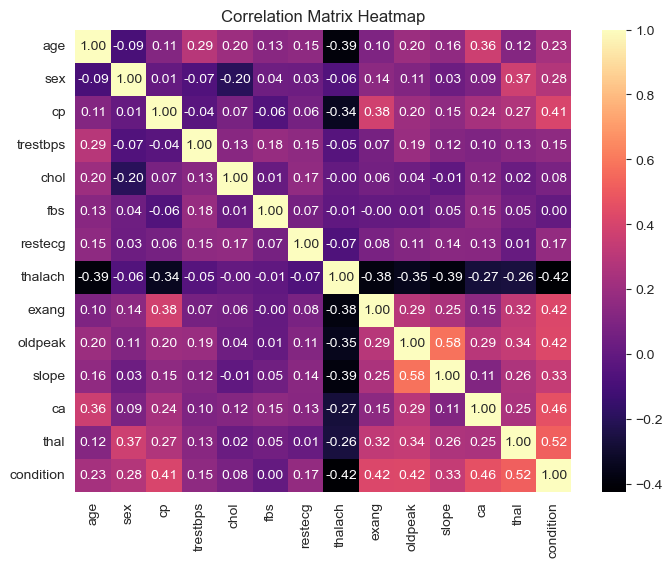

In [39]:
plt.figure(figsize=(8,6)) #figure size
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt='.2f') #heatmap
plt.title("Correlation Matrix Heatmap")

In [40]:
#printing the unique values in the column 
for i in df.columns:
    print(i, len(df[i].unique()))

age 41
sex 2
cp 4
trestbps 50
chol 152
fbs 2
restecg 3
thalach 91
exang 2
oldpeak 40
slope 3
ca 4
thal 3
condition 2


In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


# Exploratory Data Analysis

In [42]:
#setting style and color palette for seaborn plots
sns.set_style('white')
sns.set_palette("Set2")

In [43]:
#preparing data for plotting 
df2= df.copy()
#chaning labels for sex 
def chng(sex):
    if sex == 0:
        return 'female'
    else:
        return 'male'
df2['sex']= df2['sex'].apply(chng)
#chaning target labels
def chng2(prob):
    if prob == 0:
        return "Heart Disease"
    else:
        return "No Heart Disease"
df2['condition'] = df2['condition'].apply(chng2)

Text(0.5, 1.0, 'Gender v/s condition\n')

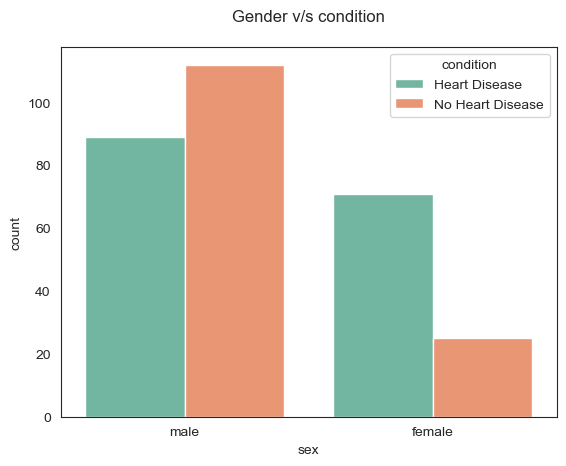

In [44]:
#plotting count of heart disease as per sex 
sns.countplot(data= df2, x='sex',hue='condition')
plt.title('Gender v/s condition\n')

According to this Cleveland dataset males are more susceptible to get Heart Disease than females. Men experience heart attacks more than women. Sudden Heart Attacks are experienced by men around 85% of the times. 


In [45]:
#changing labels for chest pain 
def chng3(cp):
    if cp==0:
        return "asymptomatic"
    elif cp==1:
        return "atypical angina"
    elif cp==2:
        return "non-anginal pain"
    else:
        return "typical angina"
df2['cp']= df2['cp'].apply(chng3)

Text(0.5, 1.0, 'Chest Pain Type v/s target\n')

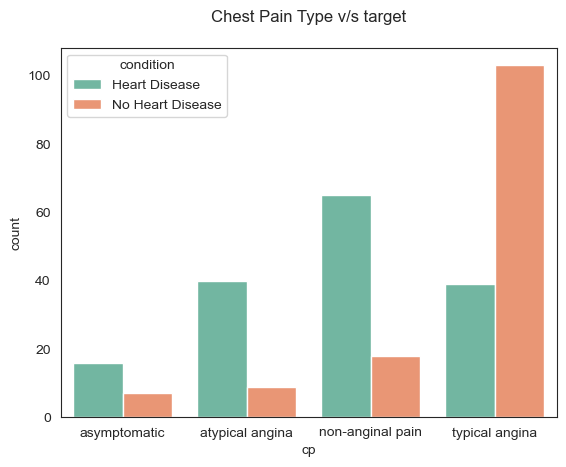

In [46]:
#plotting count of heart disease as per chest pain 
sns.countplot(data=df2, x="cp", hue= "condition")
plt.title("Chest Pain Type v/s target\n")

There are four types of chest pain, asymptomatic, atypical angina, non-anginal pain and typical angina. Most of the Heart Disease patients are found to have asymptomatic chest pain. 

Text(0.5, 1.0, 'Gender v/s Thalassemia\n')

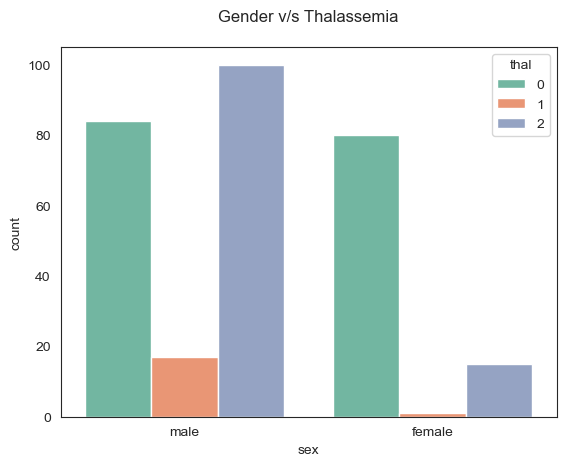

In [47]:
#plotting gender vs thalassemia 
sns.countplot(data= df2, x='sex', hue='thal')
plt.title('Gender v/s Thalassemia\n')

Text(0.5, 1.0, 'Age Distribution of Heart Diseased Patients\n')

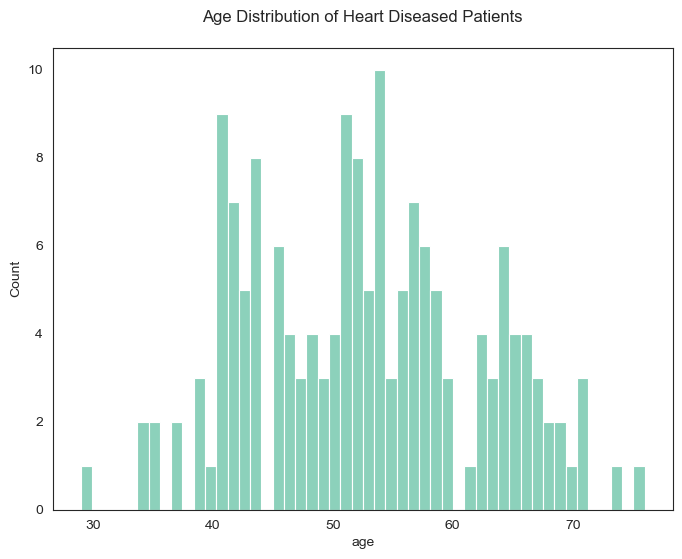

In [48]:
#visualizing distribution of ages among heart disease patients 
plt.figure(figsize=(8,6))
sns.histplot(df[df['condition']==0]['age'],kde=False,bins=50)
plt.title('Age Distribution of Heart Diseased Patients\n')

Text(0.5, 1.0, 'Chol of Heart Diseased Patients\n')

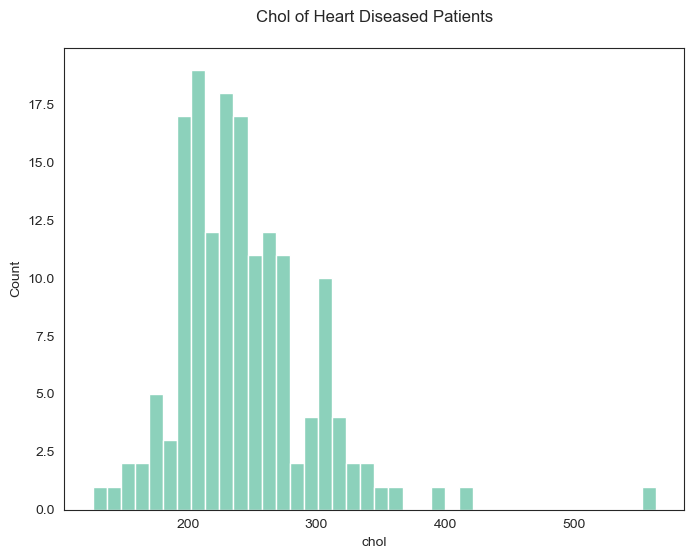

In [49]:
plt.figure(figsize=(8,6))
sns.histplot(df[df['condition']==0]['chol'],kde=False,bins=40)
plt.title('Chol of Heart Diseased Patients\n')

Text(0.5, 1.0, 'thalach of Heart Diseased Patients\n')

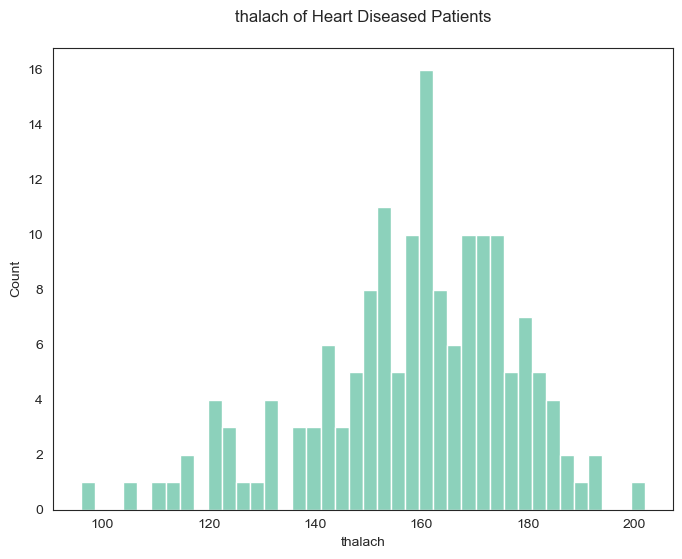

In [50]:
plt.figure(figsize=(8,6))
sns.histplot(df[df['condition']==0]['thalach'],kde=False,bins=40)
plt.title('thalach of Heart Diseased Patients\n')

# Random Forest Classifier 

In [51]:
#using random forest classifier from before 
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) # 70% training and 30% test
clf = clf.fit(X_train,y_train)
#Predict the response for test dataset
y_pred = clf.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print("Classification Report", classification_report(y_test, y_pred))

Accuracy: 0.85
Classification Report               precision    recall  f1-score   support

           0       0.90      0.81      0.85        32
           1       0.81      0.89      0.85        28

    accuracy                           0.85        60
   macro avg       0.85      0.85      0.85        60
weighted avg       0.85      0.85      0.85        60



# XGBoost Classifier 


In [52]:
import xgboost as xgb
model = xgb.XGBClassifier()
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = metrics.accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.8888888888888888


# KNN Classifier

In [53]:
import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': [23, 15, 27, 19, 29]}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Perform cross-validation with hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score: %.2f%%" % (grid_search.best_score_ * 100.0))

# Train the model with the best hyperparameters on the entire training set
best_knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
best_knn.fit(X_train, y_train)

# Make predictions on the test set
y_pred = best_knn.predict(X_test)

#Predict the response for test dataset
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

/Users/apoorvashete/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/apoorvashete/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

Best Hyperparameters: {'n_neighbors': 19}
Best Score: 69.99%
Accuracy: 0.6
              precision    recall  f1-score   support

           0       0.62      0.66      0.64        32
           1       0.58      0.54      0.56        28

    accuracy                           0.60        60
   macro avg       0.60      0.60      0.60        60
weighted avg       0.60      0.60      0.60        60



/Users/apoorvashete/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [54]:
!pip install imbalanced-learn

import pandas as pd
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import SelectKBest, f_classif

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Oversampling for class imbalance
oversampler = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)

# Feature selection
selector = SelectKBest(f_classif, k=10)
X_train_selected = selector.fit_transform(X_train_resampled, y_train_resampled)
X_test_selected = selector.transform(X_test_scaled)

# Define the parameter grid for hyperparameter tuning
param_grid = {'n_neighbors': [13, 15, 17, 19, 11]}

# Create the KNN classifier
knn = KNeighborsClassifier()

# Perform cross-validation with hyperparameter tuning
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train_selected, y_train_resampled)

# Print the best hyperparameters and the corresponding score
print("Best Hyperparameters:", grid_search.best_params_)
print("Best Score: %.2f%%" % (grid_search.best_score_ * 100.0))

# Train the model with the best hyperparameters on the entire training set
best_knn = KNeighborsClassifier(n_neighbors=grid_search.best_params_['n_neighbors'])
best_knn.fit(X_train_selected, y_train_resampled)

# Make predictions on the test set
y_pred = best_knn.predict(X_test_selected)

#Predict the response for test dataset
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 226.0/226.0 kB 2.0 MB/s eta 0:00:00a 0:00:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.0/298.0 kB 3.0 MB/s eta 0:00:0000:0100:01
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Best Hyperparameters: {'n_neighbors': 15}
Best Score: 87.47%
Accuracy: 0.7666666666666667
              precision    recall  f1-score   support

           0       0.80      0.75      0.77        32
           1       0.73      0.79      0.76        28

    accuracy                           0.77        60
   macro avg       0.77      0.77      0.77        60
weighted avg       0.77      0.77      0.77        60



/Users/apoorvashete/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/Users/apoorvashete/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None wi

# Neural Network

In [56]:
import tensorflow as tf

2023-05-20 23:41:13.966741: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [57]:
from tensorflow import keras
from sklearn.preprocessing import StandardScaler

In [59]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)

# Standardize the features using StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [64]:
print(X_train.shape)

(237, 13)


In [66]:
#build neural network 
num_features = X_train.shape[1] #determine number of features

model_nn= keras.Sequential([
    keras.layers.Dense(16, activation='relu', input_shape=(num_features,)),
    keras.layers.Dense(8, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

#compile model 
model_nn.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

#train model 
model_nn.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

#evaluate model 
loss, accuracy = model_nn.evaluate(X_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)



Epoch 1/50
8/8 [==============================] - 1s 3ms/step - loss: 0.7715 - accuracy: 0.5063
Epoch 2/50
8/8 [==============================] - 0s 2ms/step - loss: 0.7218 - accuracy: 0.5527
Epoch 3/50
8/8 [==============================] - 0s 2ms/step - loss: 0.6812 - accuracy: 0.5992
Epoch 4/50
8/8 [==============================] - 0s 3ms/step - loss: 0.6474 - accuracy: 0.6076
Epoch 5/50
8/8 [==============================] - 0s 3ms/step - loss: 0.6181 - accuracy: 0.6540
Epoch 6/50
8/8 [==============================] - 0s 2ms/step - loss: 0.5923 - accuracy: 0.6878
Epoch 7/50
8/8 [==============================] - 0s 2ms/step - loss: 0.5691 - accuracy: 0.7257
Epoch 8/50
8/8 [==============================] - 0s 2ms/step - loss: 0.5493 - accuracy: 0.7342
Epoch 9/50
8/8 [==============================] - 0s 3ms/step - loss: 0.5301 - accuracy: 0.7384
Epoch 10/50
8/8 [==============================] - 0s 2ms/step - loss: 0.5130 - accuracy: 0.7553
Epoch 11/50
8/8 [======================